In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from matplotlib.mlab import griddata

In [2]:
import tensorflow as tf
import tensorflow.contrib.layers as layers
config = tf.ConfigProto(intra_op_parallelism_threads=8, inter_op_parallelism_threads=8, \
                        allow_soft_placement=True, device_count = {'CPU': 8})
sess = tf.InteractiveSession(config = config)

In [3]:
def EM_network(data, name, reuse = tf.AUTO_REUSE):
    with tf.variable_scope(name, reuse = reuse):       
        lay = layers.relu(data, 40)
        lay = layers.relu(lay, 40)
        lay = layers.relu(lay, 20)
        outputs = layers.linear(lay, 1)
        
    these_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope = name)
    
    return outputs, these_vars

In [4]:
def EM_loss(data_P, data_Q, name):
    local_EM_network_name = name + "_EM_net"
    
    T_P, EM_vars = EM_network(data_P, name = local_EM_network_name)
    T_Q, _ = EM_network(data_Q, name = local_EM_network_name)

    EM_loss = tf.reduce_mean(T_P, axis = 0) - tf.reduce_mean(T_Q, axis = 0)
    
    batch_size_dyn = tf.cast(tf.shape(T_P)[0], tf.int32)
    rand = tf.random.uniform(shape = (batch_size_dyn, 1), minval = 0.0, maxval = 1.0)
    
    # add gradient penalty
    x_grad = tf.math.add(tf.math.multiply(rand, data_P),
                         tf.math.multiply(tf.math.subtract(1.0, rand), data_Q))
    x_grad_EM, _ = EM_network(x_grad, name = local_EM_network_name)
    grad = tf.gradients(x_grad_EM, x_grad)[0]
    
    grad_pen = tf.reduce_mean(tf.square(tf.math.abs(grad) - 1.0), axis = 0)[0]

    EM_loss_grad_pen = EM_loss[0] + 10 * grad_pen

    return EM_loss_grad_pen, EM_vars, -EM_loss

In [5]:
# this sets up everything for Wasserstein information loss
def WIE_loss(data_X, data_Y, name):
    # data drawn from p_XY
    data_P = tf.concat([data_X, data_Y], axis = 1)
    
    data_Y_shuffled = tf.random.shuffle(data_Y)
    # data drawn from p_X * p_Y
    data_Q = tf.concat([data_X, data_Y_shuffled], axis = 1)
    
    return EM_loss(data_P, data_Q, name)

In [16]:
data_X = np.random.normal(loc = 1, scale = 1, size = (50000))
data_X = np.expand_dims(data_X, axis = 1)

In [17]:
#data_Y = np.random.normal(loc = 1, scale = 1, size = (10000))
data_Y = np.multiply(data_X, data_X)
#data_Y = np.expand_dims(data_Y, axis = 1)

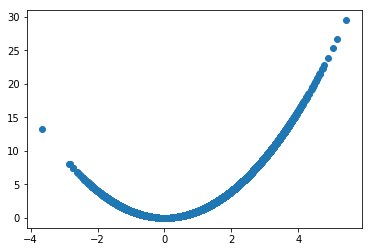

In [18]:
plt.scatter(data_X, data_Y)
plt.show()

In [9]:
data_X_in = tf.placeholder(tf.float32, [None, 1], name = 'data_X_in')
data_Y_in = tf.placeholder(tf.float32, [None, 1], name = 'data_Y_in')

In [10]:
EM_train_loss, EM_vars, EM_dist = WIE_loss(data_X_in, data_Y_in, name = "WIE_loss")

In [11]:
train_EM = tf.train.AdamOptimizer(learning_rate = 0.01, beta1 = 0.0, beta2 = 0.5).minimize(EM_train_loss, var_list = EM_vars)

In [12]:
EM_batches = 200

In [19]:
sess.run(tf.global_variables_initializer())

In [20]:
for batch in range(EM_batches):
    sess.run(train_EM, feed_dict = {data_X_in: data_X, data_Y_in: data_Y})
    EM_dist_val = sess.run(EM_dist, feed_dict = {data_X_in: data_X, data_Y_in: data_Y})
    
    print("EM_dist = {}".format(EM_dist_val))

EM_dist = [0.02572155]
EM_dist = [0.0206809]
EM_dist = [0.01873636]
EM_dist = [0.04511046]
EM_dist = [0.0663234]
EM_dist = [0.1382556]
EM_dist = [0.16799939]
EM_dist = [0.17942631]
EM_dist = [0.21425366]
EM_dist = [0.2874416]
EM_dist = [0.2305218]
EM_dist = [0.35762966]
EM_dist = [0.26632226]
EM_dist = [0.36905766]
EM_dist = [0.31594765]
EM_dist = [0.29568756]
EM_dist = [0.38188577]
EM_dist = [0.381747]
EM_dist = [0.40876126]
EM_dist = [0.37738323]
EM_dist = [0.44943643]
EM_dist = [0.4135357]
EM_dist = [0.48209953]
EM_dist = [0.4777434]
EM_dist = [0.51805544]
EM_dist = [0.48364043]
EM_dist = [0.56009793]
EM_dist = [0.540444]
EM_dist = [0.57006335]
EM_dist = [0.54672766]
EM_dist = [0.6198642]
EM_dist = [0.6124518]
EM_dist = [0.61051846]
EM_dist = [0.64319277]
EM_dist = [0.62619376]
EM_dist = [0.6157663]
EM_dist = [0.68179417]
EM_dist = [0.6419823]
EM_dist = [0.6656003]
EM_dist = [0.6739335]
EM_dist = [0.6711676]
EM_dist = [0.66255784]
EM_dist = [0.67593646]
EM_dist = [0.68525124]
EM_dis